In [4]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
train = pd.read_csv(r'C:\Users\hung\Downloads\titanic\train.csv')
test = pd.read_csv(r'C:\Users\hung\Downloads\titanic\test.csv')
#train=train.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# Splitting the dataset into the Training set and Test set
#X_train=train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_train=train[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X_train["Sex"].replace({"male": 1, "female": 0}, inplace=True)
# X_train["Embarked"].replace({"C": 0, "Q": 1, "S": 2}, inplace=True)

from missingpy import MissForest
imputer = MissForest()
X_train.replace([np.inf, -np.inf], np.nan)
X_imputed = imputer.fit_transform(X_train)
#X_train.replace(np.inf,imputer.fit_transform(X_train), inplace=True)
#X_train.replace(np.nan, imputer.fit_transform(X_train), inplace=True)
#X_train.replace(np.inf, X_train.mean(), inplace=True)

#X_train.astype('int64').dtypes
#X_imputed.astype('int64').dtypes
Y_train=train['Survived']

# Training the Random Forest Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier = DecisionTreeClassifier(criterion = 'entropy',  max_depth=3, random_state = 0)
#classifier.fit(X_train, Y_train)
classifier.fit(X_imputed, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_imputed)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_train, Y_pred)
print(cm)
accuracy_score(Y_train, Y_pred)
from sklearn.metrics import precision_score
print(precision_score(Y_train, Y_pred))

C:\Users\hung\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
[[480  69]
 [100 242]]
0.7781350482315113


In [5]:
#X_test=test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test=test[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X_test["Sex"].replace({"male": 1, "female": 0}, inplace=True)
#X_test["Embarked"].replace({"C": 0, "Q": 1, "S": 2}, inplace=True)
# X_test.fillna(X_test.mean())
# X_test.replace(np.nan, X_test.mean(), inplace=True)
# X_test.replace(np.inf, X_test.mean(), inplace=True)
X_test.replace([np.inf, -np.inf], np.nan)
X_imputed_test = imputer.fit_transform(X_test)
#X_test.astype('int64').dtypes
y_pred = classifier.predict(X_imputed_test)
print(y_pred)

C:\Users\hung\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [6]:
test = pd.read_csv(r'C:\Users\hung\Downloads\titanic\test.csv')
test['Survived']=y_pred
test=test[['PassengerId','Survived']]
test.to_csv(r'C:\Users\hung\Downloads\test.csv', index=False)

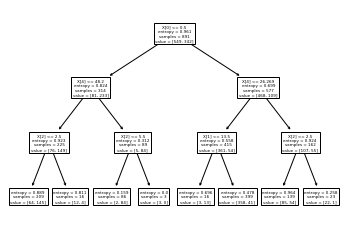

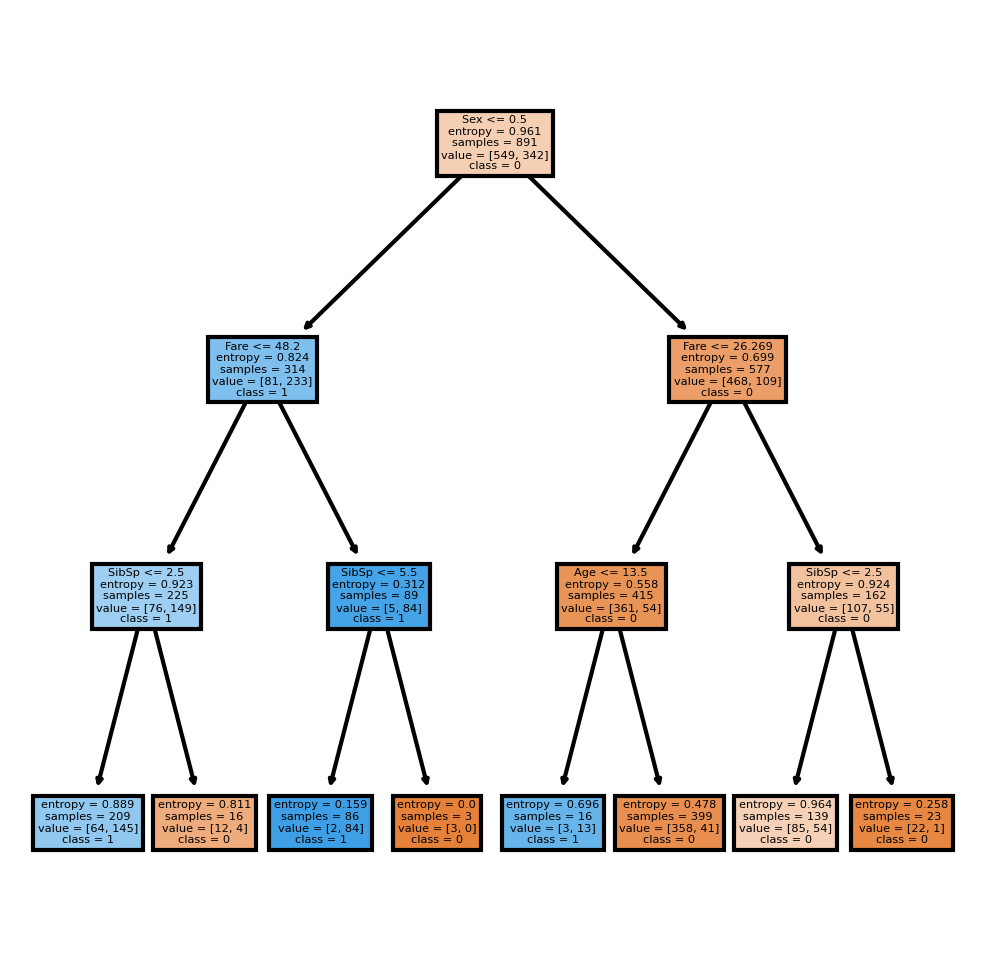

In [48]:
from sklearn import tree
tree.plot_tree(classifier)

#fn=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
fn=['Sex', 'Age', 'SibSp', 'Parch', 'Fare']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [22]:

pd.crosstab(index=X_train['SibSp'], columns='Count')

col_0,Count
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7
